# Flights on December 2008 Data Exploration
## by Thais Ruiz

## Preliminary Wrangling

This document explores a dataset of 544,958 domestic flights operations on December 2008.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
from plotly.offline import init_notebook_mode, iplot
from collections import Counter

%matplotlib inline

init_notebook_mode(connected=True) # send Plotly output to notebook

In [2]:
# load in the datasets into pandas dataframes
file_dir = 'C:/Users/DuranRuiz/Desktop/NanoDegree Data Analyst/Communicate Data Findings Project/Datasource'
os.chdir(file_dir)

flights_2008 = pd.read_csv('2008.csv')
airports = pd.read_csv('L_AIRPORT.csv')

In [3]:
# high-level overview of data shape and composition
print(flights_2008.shape)
print(flights_2008.dtypes)
print(flights_2008.head())

(7009728, 29)
Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object
   Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955  

In [4]:
print(airports.shape)
print(airports.dtypes)
print(airports.sample(10))

(6510, 2)
Code           object
Description    object
dtype: object
     Code                                        Description
6024  WUG                 Wau, Papua New Guinea: Wau Airport
4540  QBN  Middle Bass Island, OH: Middle Bass Island Air...
6049  WZY          Nassau, The Bahamas: Nassau Seaplane Base
1367  DFI                    Defiance, OH: Defiance Memorial
1532  EAG                      Noatak, AK: Eagle Creek Strip
1242  CTU                          Chengdu, China: Shuangliu
4923  SFO     San Francisco, CA: San Francisco International
6023  WTT                     Whittier, AK: Whittier Airport
1635  EPL                   Epinal, France: Epinal Mirecourt
100   A85                   Big River, AK: Big River Airport


In [5]:
# Subset of domestic flights operations on Dec-2008
flights_0812 = flights_2008[(flights_2008.Month==12)]

# Remove columns: Year, Month, TaxiIn, TaxiOut, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, Distance 
flights_0812 = flights_0812[['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',\
                             'UniqueCarrier', 'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Cancelled',\
                             'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay',\
                             'SecurityDelay', 'LateAircraftDelay']]

In [6]:
# Merge origin/destination description fields from airport dataframe to flights_0812 dataframe
flights_0812 = pd.merge(flights_0812, airports, left_on='Origin', right_on='Code').drop('Code', axis=1)
flights_0812.rename(columns = {'Description':'OriginDescription'}, inplace = True)

flights_0812 =  pd.merge(flights_0812, airports, left_on='Dest', right_on='Code').drop('Code', axis=1)
flights_0812.rename(columns = {'Description':'DestDescription'}, inplace = True)

In [7]:
# Check merged columns
print(flights_0812.columns)
flights_0812.sample(5)[['Origin', 'Dest', 'OriginDescription', 'DestDescription']]

Index(['DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'ArrDelay', 'DepDelay',
       'Origin', 'Dest', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'OriginDescription', 'DestDescription'],
      dtype='object')


,Origin,Dest,OriginDescription,DestDescription
264520,PHX,DFW,"Phoenix, AZ: Phoenix Sky Harbor International","Dallas/Fort Worth, TX: Dallas/Fort Worth Inter..."
401908,LGA,MIA,"New York, NY: LaGuardia","Miami, FL: Miami International"
55339,AUS,LBB,"Austin, TX: Austin - Bergstrom International","Lubbock, TX: Lubbock Preston Smith International"
35501,SNA,LAS,"Santa Ana, CA: John Wayne Airport-Orange County","Las Vegas, NV: McCarran International"
483163,SLC,RAP,"Salt Lake City, UT: Salt Lake City International","Rapid City, SD: Rapid City Regional"


In [8]:
flights_0812.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544958 entries, 0 to 544957
Data columns (total 22 columns):
DayofMonth           544958 non-null int64
DayOfWeek            544958 non-null int64
DepTime              527926 non-null float64
CRSDepTime           544958 non-null int64
ArrTime              526376 non-null float64
CRSArrTime           544958 non-null int64
UniqueCarrier        544958 non-null object
FlightNum            544958 non-null int64
ArrDelay             524747 non-null float64
DepDelay             527926 non-null float64
Origin               544958 non-null object
Dest                 544958 non-null object
Cancelled            544958 non-null int64
CancellationCode     17779 non-null object
Diverted             544958 non-null int64
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64
OriginDe

In [9]:
# Change columns to category type
categories_cols = ['DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest']

for col in categories_cols:
    flights_0812[col] = flights_0812[col].astype('category')

In [10]:
flights_0812.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 544958 entries, 0 to 544957
Data columns (total 22 columns):
DayofMonth           544958 non-null int64
DayOfWeek            544958 non-null category
DepTime              527926 non-null float64
CRSDepTime           544958 non-null int64
ArrTime              526376 non-null float64
CRSArrTime           544958 non-null int64
UniqueCarrier        544958 non-null category
FlightNum            544958 non-null int64
ArrDelay             524747 non-null float64
DepDelay             527926 non-null float64
Origin               544958 non-null category
Dest                 544958 non-null category
Cancelled            544958 non-null int64
CancellationCode     17779 non-null object
Diverted             544958 non-null int64
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64

In [11]:
flights_0812.sample(10)

,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,OriginDescription,DestDescription
428761,16,2,2025.0,1855,2254.0,2105,OO,2814,109.0,90.0,...,0,NaN,0,0.0,0.0,19.0,0.0,90.0,"Milwaukee, WI: General Mitchell International","Columbus, OH: John Glenn Columbus International"
465144,14,7,1300.0,1300,1628.0,1640,XE,2105,-12.0,0.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Houston, TX: George Bush Intercontinental/Houston","Grand Rapids, MI: Gerald R. Ford International"
524487,15,1,1353.0,1331,1537.0,1535,9E,2961,2.0,22.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Detroit, MI: Detroit Metro Wayne County","Bangor, ME: Bangor International"
287953,6,6,633.0,638,750.0,808,XE,2733,-18.0,-5.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Richmond, VA: Richmond International","Cleveland, OH: Cleveland-Hopkins International"
309891,12,5,1506.0,1429,1655.0,1633,NW,531,22.0,37.0,...,0,NaN,0,5.0,0.0,0.0,0.0,17.0,"New York, NY: LaGuardia","Detroit, MI: Detroit Metro Wayne County"
399653,14,7,1720.0,1710,1941.0,1955,AA,1219,-14.0,10.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Washington, DC: Ronald Reagan Washington National","Miami, FL: Miami International"
435927,31,3,1454.0,1400,1832.0,1735,WN,1922,57.0,54.0,...,0,NaN,0,16.0,0.0,3.0,0.0,38.0,"Philadelphia, PA: Philadelphia International","San Antonio, TX: San Antonio International"
32508,4,4,1640.0,1640,1753.0,1755,WN,1792,-2.0,0.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Reno, NV: Reno/Tahoe International","Las Vegas, NV: McCarran International"
450600,17,3,918.0,925,1102.0,1057,US,1942,5.0,-7.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"Charlotte, NC: Charlotte Douglas International","Buffalo, NY: Buffalo Niagara International"
422518,29,1,924.0,925,1234.0,1252,B6,1061,-18.0,-1.0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,"New York, NY: John F. Kennedy International","Austin, TX: Austin - Bergstrom International"


In [12]:
# Descriptive statistics for numeric variables

delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

print(flights_0812[['ArrDelay', 'DepDelay', 'Cancelled', 'Diverted'] + delay_cols].describe())

            ArrDelay       DepDelay      Cancelled       Diverted  \
count  524747.000000  527926.000000  544958.000000  544958.000000   
mean       16.680505      17.304380       0.032625       0.004463   
std        48.570617      44.880798       0.177652       0.066654   
min       -90.000000     -49.000000       0.000000       0.000000   
25%        -8.000000      -3.000000       0.000000       0.000000   
50%         2.000000       0.000000       0.000000       0.000000   
75%        23.000000      18.000000       0.000000       0.000000   
max      1655.000000    1597.000000       1.000000       1.000000   

        CarrierDelay   WeatherDelay       NASDelay  SecurityDelay  \
count  168647.000000  168647.000000  168647.000000  168647.000000   
mean       15.422806       4.435057      17.251395       0.072228   
std        39.539046      25.519685      31.153545       1.565449   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

### What is the structure of your dataset?

There are 544,958 entries in the dataset with information of flights operations on December 2008. It features airlines, origin/destination, flight dates, scheduled and actual arrival/departure times, delays time/causes and cancellation/divert status.

It has the following numeric variables:
- the ones related to time: departure/arrivals times and the delays which are the difference between the actual and scheduled times
- the time of delays caused by carrier, weather, NAS (National Airspace System), security and late aircraft. Their values are in minutes and the sum of these five totals the arrival delay, also measured in minutes. The delay causes for a flight could be multiple and only apply to delayed flights.

A flight is considered delayed when its arrival delay is longer than 15 minutes.

The whole flights dataset could be seen as it is comprised by four main datasets, which are exclusive among them:
on time (arrival delay is less than 15 minutes), delayed (arrival delays equal or greather than 15 minutes), cancelled and diverted.

Therefore, the categorical variables are:
- extractable directly from the dataframe like: days of week, airlines, origin/destination, delay causes (not their values in minutes), cancellation causes, and cancellation/divert status 
- derived from splitting the dataframe in the four flight categories per their (exclusive) statuses like: on time, delayed, cancelled and diverted 

Similarly as the causes of delays are applicable only for delayed flights, the same happens to causes of cancellation which are only applicable for cancelled flights. This means that for the rest of flights out of these categories, the values are null on these columns as corresponding.



### What is/are the main feature(s) of interest in your dataset?

I am most interested in figuring out which airlines had more flight delays and what are the causes on December 2008.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect main US cities close the holidays time have more and longest delays; also expect flights to/from these destinations/origins be cancelled per winter weather conditions.

I deem convenient for the investigation, to remove the cancelled and diverted flights records, since their data is no relevant to the investigation.

### Data Subsets: On Time and Delayed Flights

In [13]:
# Remove cancelled and diverted flights data
cancelled = flights_0812.Cancelled==1
diverted  = flights_0812.Diverted==1

flights = flights_0812[(~cancelled) & (~diverted)].drop(['Cancelled', 'CancellationCode', 'Diverted'], axis=1)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524747 entries, 0 to 544957
Data columns (total 19 columns):
DayofMonth           524747 non-null int64
DayOfWeek            524747 non-null category
DepTime              524747 non-null float64
CRSDepTime           524747 non-null int64
ArrTime              524747 non-null float64
CRSArrTime           524747 non-null int64
UniqueCarrier        524747 non-null category
FlightNum            524747 non-null int64
ArrDelay             524747 non-null float64
DepDelay             524747 non-null float64
Origin               524747 non-null category
Dest                 524747 non-null category
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64
OriginDescription    524747 non-null object
DestDescription      524747 non-null object
dtypes: category(4), float64(9), int64(4

In [14]:
# Subset On Time and Delayed flights
on_time = flights.ArrDelay<15
delayed = flights.ArrDelay>=15 # A flight is considered delayed if its (arrival) delay is over 15 minutes (inclusive)

on_time_flights = flights[on_time]
delayed_flights = flights[delayed]

In [15]:
# On Time flights data info
on_time_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356100 entries, 1 to 544957
Data columns (total 19 columns):
DayofMonth           356100 non-null int64
DayOfWeek            356100 non-null category
DepTime              356100 non-null float64
CRSDepTime           356100 non-null int64
ArrTime              356100 non-null float64
CRSArrTime           356100 non-null int64
UniqueCarrier        356100 non-null category
FlightNum            356100 non-null int64
ArrDelay             356100 non-null float64
DepDelay             356100 non-null float64
Origin               356100 non-null category
Dest                 356100 non-null category
CarrierDelay         0 non-null float64
WeatherDelay         0 non-null float64
NASDelay             0 non-null float64
SecurityDelay        0 non-null float64
LateAircraftDelay    0 non-null float64
OriginDescription    356100 non-null object
DestDescription      356100 non-null object
dtypes: category(4), float64(9), int64(4), object(2)
memory usage

In the On Time dataset, delay causes columns are extraneous and null. They should be removed.

In [16]:
# Removing delay causes columns on On Time flights dataset
on_time_flights = on_time_flights.drop(delay_cols, axis=1)
on_time_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 356100 entries, 1 to 544957
Data columns (total 14 columns):
DayofMonth           356100 non-null int64
DayOfWeek            356100 non-null category
DepTime              356100 non-null float64
CRSDepTime           356100 non-null int64
ArrTime              356100 non-null float64
CRSArrTime           356100 non-null int64
UniqueCarrier        356100 non-null category
FlightNum            356100 non-null int64
ArrDelay             356100 non-null float64
DepDelay             356100 non-null float64
Origin               356100 non-null category
Dest                 356100 non-null category
OriginDescription    356100 non-null object
DestDescription      356100 non-null object
dtypes: category(4), float64(4), int64(4), object(2)
memory usage: 31.9+ MB


In [17]:
# Delayed flights data info
delayed_flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168647 entries, 0 to 544956
Data columns (total 19 columns):
DayofMonth           168647 non-null int64
DayOfWeek            168647 non-null category
DepTime              168647 non-null float64
CRSDepTime           168647 non-null int64
ArrTime              168647 non-null float64
CRSArrTime           168647 non-null int64
UniqueCarrier        168647 non-null category
FlightNum            168647 non-null int64
ArrDelay             168647 non-null float64
DepDelay             168647 non-null float64
Origin               168647 non-null category
Dest                 168647 non-null category
CarrierDelay         168647 non-null float64
WeatherDelay         168647 non-null float64
NASDelay             168647 non-null float64
SecurityDelay        168647 non-null float64
LateAircraftDelay    168647 non-null float64
OriginDescription    168647 non-null object
DestDescription      168647 non-null object
dtypes: category(4), float64(9), int64(4

In [66]:
delayed_flights.describe()

,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000,168647.000000
mean,17.181871,1465.941588,1399.721454,1563.466163,1581.413556,2357.344649,62.554721,53.529722,15.422806,4.435057,17.251395,0.072228,25.373235
std,8.293763,472.607571,439.679926,559.428175,463.076622,2061.331436,63.287180,64.200553,39.539046,25.519685,31.153545,1.565449,45.011729
min,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,15.000000,-34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,1117.000000,1040.000000,1230.000000,1230.000000,658.000000,24.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18.000000,1510.000000,1425.000000,1642.000000,1624.000000,1676.000000,41.000000,35.000000,0.000000,0.000000,7.000000,0.000000,3.000000
75%,23.000000,1841.000000,1749.000000,2014.000000,1950.000000,3593.000000,77.000000,71.000000,15.000000,0.000000,22.000000,0.000000,33.000000
max,31.000000,2400.000000,2359.000000,2400.000000,2359.000000,9741.000000,1655.000000,1597.000000,1307.000000,1352.000000,903.000000,254.000000,1143.000000


In [18]:
# Compare sum of the causes of the delay columns with arrival delay

(delayed_flights[delay_cols].sum(axis=1) == delayed_flights['ArrDelay']).sum()

168647

The sum of the delay causes in minutes totals the arrival delay  in the  delayed flights subset

#### Proportion of On Time and Delayed Flights on December 2008

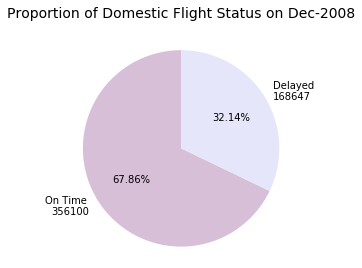

In [19]:
# Pie chart plotting

sizes  = [len(on_time_flights), len(delayed_flights)]
colors = ['thistle','lavender']
labels = ['On Time \n' + str(sizes[0]), 'Delayed \n' + str(sizes[1])]

patches, texts, autotexts = plt.pie(sizes, autopct='%.2f%%', startangle=90, colors=colors, labels=labels)

plt.axis('square') # equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proportion of Domestic Flight Status on Dec-2008\n', fontsize=14);

Out of 524,747 on track flights on December 2008, 356,100 were on time (67.86%) and 168,647 (32.14%) delayed. This set excludes the cancelled and diverted flights.
Flights with arrival delays over 15 minutes are the ones considered as 'delayed'.

## Univariate Exploration


#### Departure/Arrival Delays on December 2008

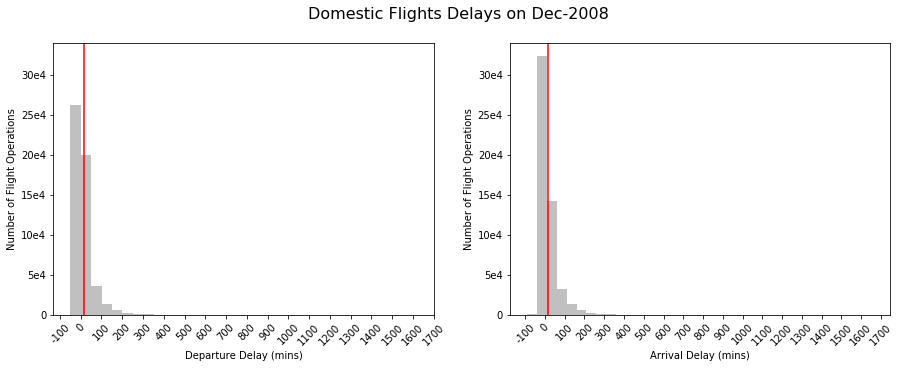

In [20]:
# Histogram plotting

fig = plt.figure(figsize = [15, 5])
fig.suptitle('Domestic Flights Delays on Dec-2008', fontsize=16)

# Departure and Arrival delays subset without Nan values
dep_delay = flights.DepDelay
arr_delay = flights.ArrDelay

dep_bins = np.arange(dep_delay.min(), dep_delay.max()+50, 50) 
arr_bins = np.arange(arr_delay.min(), arr_delay.max()+50, 50) 

xticks = [i*100 for i in np.arange(-1, 18)]
yticks = [i*5e4 for i in np.arange(0, 7)]
ylabels = ['0','5e4', '10e4', '15e4', '20e4', '25e4', '30e4']

ax1 = plt.subplot(1,2,1)
plt.hist(dep_delay, bins=dep_bins, color='silver')
plt.xlabel('Departure Delay (mins)')
plt.ylabel('Number of Flight Operations')
plt.xticks(xticks, xticks, rotation=45)
plt.yticks(yticks, ylabels)
plt.axvline(x=15, c='red');

ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.hist(arr_delay, bins=arr_bins, color='silver')
plt.xlabel('Arrival Delay (mins)')
plt.ylabel('Number of Flight Operations')
plt.xticks(xticks, xticks, rotation=45)
plt.axvline(x=15, c='red');

Both of the above distributions are right skewed, with long tail.

On each plot, the red line divides the on time flights to the left, and the delayed ones to the right.
A flight is considered delayed when it has a delay of 15 or more minutes than the schedule.

Delay plots show many on time flights on Dec-2008: more than 250,000 for departure and more than 300,000 for arrivals; but still it is visible a bulk of delayed flights too: around 200,000 for departure and close to 150,000 for arrivals.

Interesting that the frequency for ontime flights are different in both plots; with an approximate difference around 50,000 flights, which delays are in the negative range from -100 to 0 minutes.

It might be worthy to explore these skewed distributions on a log scale.

To plot on a log scale, the logarithym function has to be applied on the data, but since this one has negative values and the function applies only to positive values, it will be necessary to shift the data to the right side of the y-axis in the plot for visualization purposes. How far right does it need to be shifted? I will take the minimum values +1 (to avoid calculation of log(0))

In [21]:
min_dep = dep_delay.min()
min_arr = arr_delay.min()
text = 'Since the minimum delay times are {} for departure and {} for arrival, then will add 50 and 91 to the data to set the minimum in 1s'
print(text.format(int(min_dep), int(min_arr)))

Since the minimum delay times are -49 for departure and -90 for arrival, then will add 50 and 91 to the data to set the minimum in 1s


(20, 600)

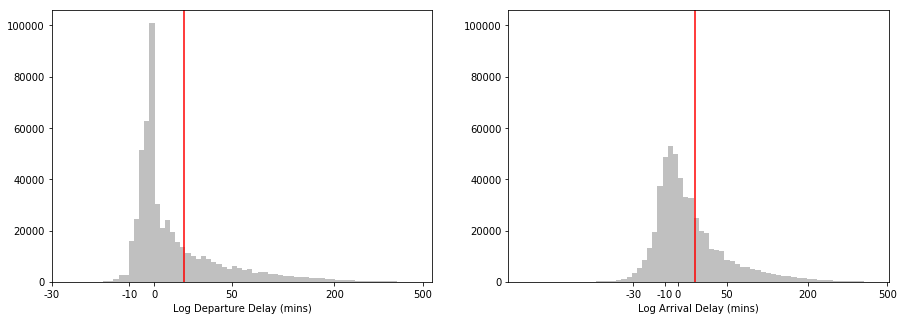

In [22]:
# Delayed departures and arrivals on a log scale

plt.figure(figsize = [15, 5]);
fig.suptitle('(Log) Domestic Flights Delays on Dec-2008', fontsize=16)

dep_del_50 = dep_delay+50
arr_del_91 = arr_delay+91

bin_size = .02
dep_bins = 10 ** np.arange(0, np.log10((dep_del_50).max())+bin_size, bin_size)
arr_bins = 10 ** np.arange(0, np.log10((arr_del_91).max())+bin_size, bin_size)

x_labels = [-30, -10, 0, 50, 200, 500, 1000]
xticks_dep = [x+50 for x in x_labels]
xticks_arr = [x+91 for x in x_labels]

# Departure delay subplot
ax1 = plt.subplot(1,2,1)
plt.hist(dep_del_50, bins=dep_bins, color='silver')
plt.xscale('log')
plt.xlabel('Log Departure Delay (mins)')
plt.xticks(xticks_dep, x_labels)
plt.axvline(15+50, color='r')
ax1.xaxis.set_minor_locator(plt.NullLocator());
plt.xlim(20,600)

# Arrival delay subplot
ax2 = plt.subplot(1,2,2, sharey=ax1)
plt.hist(arr_del_91, bins=arr_bins, color='silver')
plt.xscale('log')
plt.xlabel('Log Arrival Delay (mins)')
plt.xticks(xticks_arr, x_labels)
plt.axvline(15+91, color='r')
ax2.xaxis.set_minor_locator(plt.NullLocator());
plt.xlim(20,600)

When plotted on a log-scale, the distribution shape for departure delays is still right skewed, it looks logarithmic, while for arrival delays is more similar to a Normal distribution. The main peak on both distribution show very punctual flights, with frequencies on departure delays in the 100k and in the 50k (half of it) on arrival delays. Outliers seem to be located on delays above 200 mins (>~ 3.5 hours) for both.

The red line divides on time flights to the left and delayed to the right on the x-axis. Since the size of both distributions was small in the original plot, it was necessary to set limits on the x-axis to be able to get a closer look on the bulk of the distributions.

#### Delay Causes on Dec-2008

Arrival delay times is the sum of the causes delay times; but the cause of a delay can be one or multiple.
Not all the listed causes contributes to arrival delay times, unless their values are greater than 0 minutes.

For this reason, the following histograms will plot the frequency of flights with delay causes time greater than 1 minute; delay causes with 0 as values null them as delay causes by definition. 

In [23]:
delay_cols = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
col_labels = [col[:-5] for col in delay_cols]

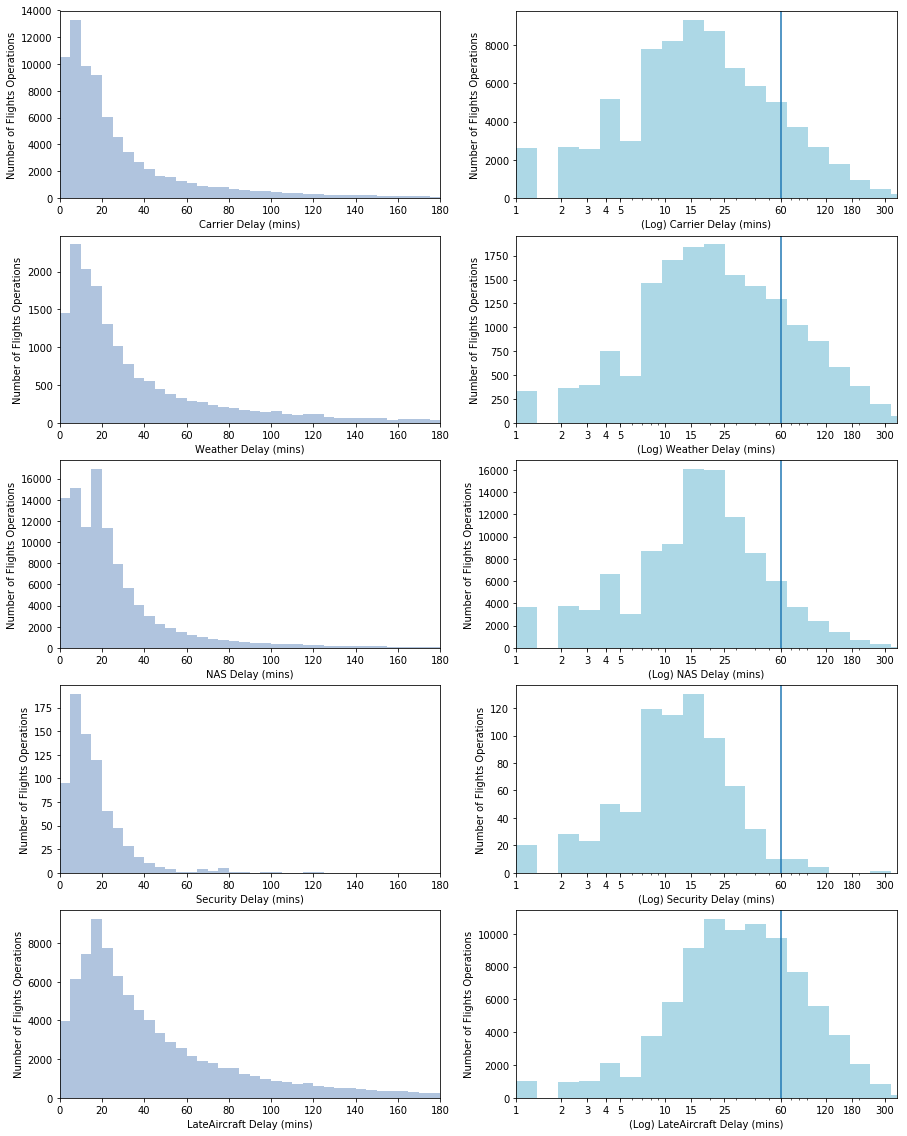

In [136]:
# Histogram subplotting in Scalar and Log scale
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=[15,20]);

for i in np.arange(0,10):
    plt.subplot(5,2,i+1)
    col = str(delay_cols[int(i/2)]) # cause column (string)
    data = delayed_flights[delayed_flights[col]>0] # causes with times different from 0 minutes


    if i%2 == 0: # histogram (left)

        binsize = 5
        bins = np.arange(0, data[col].max() + binsize, binsize)
               
        plt.hist(data=data, x=col, bins=bins, color='lightsteelblue')
        plt.xlabel(col[:-5] + ' Delay (mins)')

        # Remove from sight delays longer than 3 hours to get a closer look to the bulk of the distribution       
        plt.xlim(0,180)
  
    else: # histogram on log scale (right)

        binsize = 0.14
        log_bins = 10 ** np.arange(np.log10(data[col].min()), np.log10(data[col].max())+binsize, binsize)
        
        plt.hist(data=data, x=col, bins=log_bins, color='lightblue')
        plt.xscale('log')
        plt.xlabel('(Log) ' + col[:-5] + ' Delay (mins)')   
    
        xticks = [1, 2, 3, 4, 5, 10, 15, 25, 60, 120, 180, 300]
        plt.xticks(xticks, xticks)
        
        plt.axvline(60) # to mark one hour delay
        
        # Remove from sight delays longer than 6 hours to get a closer look to the bulk of the distribution       
        plt.xlim(0,360)

    plt.ylabel('Number of Flights Operations')


plt.show()
# Source: https://stackoverflow.com/questions/10035446/how-can-i-make-a-blank-subplot-in-matplotlib

Since the cause delays distributions have a logarithmic shape, they were plot on a log scale (on its right).

On this scale, these distributions look pretty much Normal; with the main peak in the range of 13-25 minutes for carrier (frequency 10k), weather (frequency 1.8k) and NAS (frequency 16k) as delay causes; for security issues the main peak is located between 13-18 minutes (less than 140) and for late aircraft arrival between 18-25 minutes (frequency 11k).

In all of these distribution there is a little peak between 4-5 minutes.

Per their frequencies, it looks like that the top reason of delay is due to the National Aviation System (NAS), followed by late-arriving aircraft, air carrier and extreme weather. The bottom reason for delay is due to security issues.

The blue line delimits delays longer than one hour to the right. It seems that pretty much the duration of these delays are less than one hour.

####################
Air Carrier: The cause of the cancellation or delay was due to circumstances within the airline's control (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).

Extreme Weather: Significant meteorological conditions (actual or forecasted) that, in the judgment of the carrier, delays or prevents the operation of a flight such as tornado, blizzard or hurricane.

National Aviation System (NAS): Delays that refer to a broad set of conditions, such as non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control.

Late-arriving aircraft: A previous flight with same aircraft arrived late, causing the present flight to depart late.

Security: Delays caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.

#### Flights Operations by Airlines on Dec-2008

In [25]:
# Dictionary of airlines codes and names
Airlines = {'9E':'Endeavor Air', 'AA':'American Airlines', 'AS':'Alaska Airlines', 'B6':'JetBlue Airways',\
            'CO':'Continental Air Lines', 'DL':'Delta Air Lines', 'EV':'ExpressJet Airlines', 'F9':'Frontier Airlines',\
            'FL':'AirTran Airways', 'HA': 'Hawaiian Airlines', 'MQ':'Envoy Air', 'NW':'Northwest Airlines',\
            'OH':'PSA Airlines', 'OO':'SkyWest Airlines', 'UA':'United Air Lines', 'US':'US Airways',\
            'WN': 'Southwest Airlines', 'XE':'ExpressJet Airlines(1)', 'YV':'Mesa Airlines'}

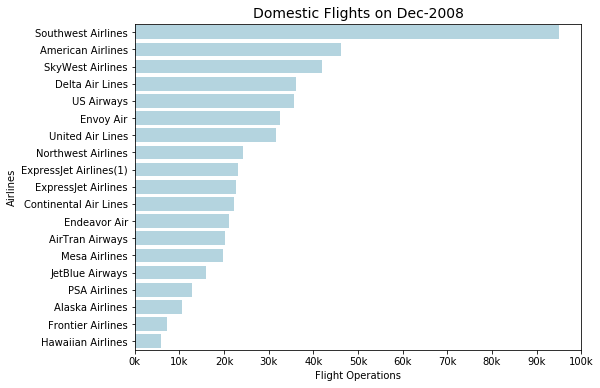

In [26]:
# Bar chart plotting

cat_order = flights['UniqueCarrier'].value_counts().index

plt.figure(figsize=(8,6))
sb.countplot(data=flights, y='UniqueCarrier', color='lightblue', order=cat_order)

plt.title( 'Domestic Flights on Dec-2008', fontsize=14)
plt.xlabel('Flight Operations')
plt.ylabel('Airlines');

xlocs   = [0, 10e3, 20e3, 30e3, 40e3, 50e3, 60e3, 70e3, 80e3, 90e3, 10e4]
xlabels = ['{}k'.format(i*10) for i in np.arange(0,11)]
plt.xticks(xlocs, xlabels)

ylocs, ylabels = plt.yticks()
ylabels = [Airlines[cat] for cat in cat_order]
plt.yticks(ylocs, ylabels);

The airline with more flight operations (almost 100,000) on Dec-2008 was Southwest, followed by American and Skywest (both airlines with operations above the mid 40,000). Southwest doubles the number of flight operations of the following top two!

On the bottom side, Frontier and Hawaiian Airlines, operated each one less than 10,000 flights that period.

It would be expected that the airlines with most number of operations, be the ones with more delays. But this exploration will take place in the Bivariate Exploration section.

#### Domestic Flights Operations per Days of Week

Since December has 31 days, 4 weeks + 3 days, the frequency of days of the week is 4 for four days and 5 for the other three days. To be fair on the Days of Week comparison, the frequency flights will be measured by the average of flights per day of the week.

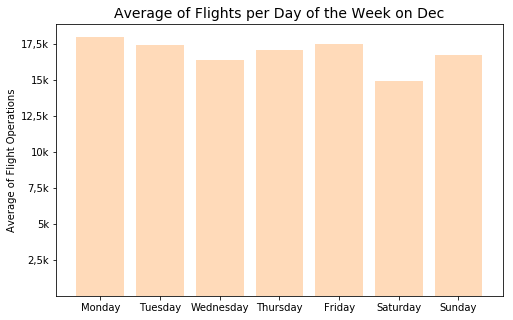

In [27]:
# Bar plotting
plt.figure(figsize=[8,5]);

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_frequency = [5,5,5,4,4,4,4]

groupby_day_wk = flights.groupby('DayOfWeek').count()[['DayofMonth']]
day_avg = groupby_day_wk.DayofMonth / days_frequency # average of flights per day of the week

plt.bar(day_avg.index, day_avg, color='peachpuff')
plt.title('Average of Flights per Day of the Week on Dec', fontsize=14)
plt.ylabel('Average of Flight Operations')
plt.xticks(np.arange(1,8), days)
plt.yticks([2500,5000,7500,10000,12500,15000,17500],['2,5k','5k','7,5k','10k','12,5k','15k','17,5k']);

On Dec-2008, the most popular traveling day was Friday, followed by Monday (both days with an average around 18,500 daily flights). The less popular traveling day was Saturday (average around 15,500 daily flights).

#### Domestic Flights Timeline on Dec-2008

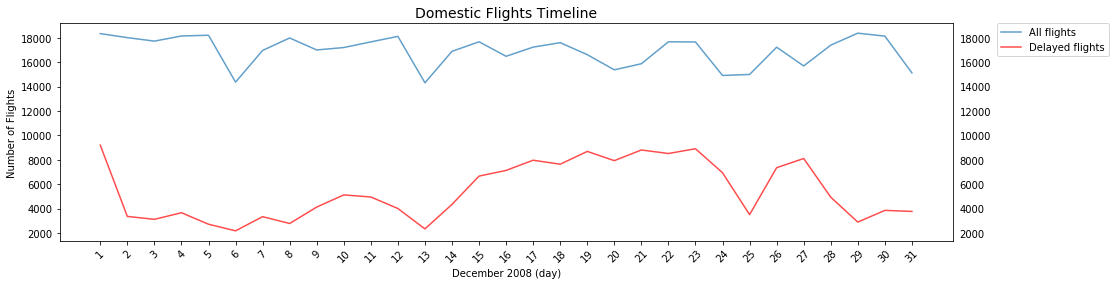

In [46]:
# Timeline plotting
plt.figure(figsize=[16,4])

groupby_day_all = flights.groupby('DayofMonth').count()[['DayOfWeek']]
groupby_day_del = delayed_flights.groupby('DayofMonth').count()[['DayOfWeek']]

# Stacking two plots
plt.errorbar(x=groupby_day_all.index, y=groupby_day_all, alpha=.7, label='All flights');
plt.errorbar(x=groupby_day_del.index, y=groupby_day_del, color='r', alpha=.7, label='Delayed flights');

plt.title( 'Domestic Flights Timeline', fontsize=14)
plt.xlabel('December 2008 (day)')
plt.ylabel('Number of Flights')

plt.tick_params(axis='y', which='both', labelleft='on', labelright='on')

xticks = np.arange(1,32)
plt.xticks(xticks, xticks, rotation=45)

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

# Source: https://matplotlib.org/1.3.1/users/legend_guide.html

Both lines follow a rough parallel 
There is an ascending trend of flights frequency since Dec-13

On every week the timeline looks similar ('bimodal' shape) until December 20th (a day before Hanukkah commences). From this date on, the frequency of flight operations is exceptional per the Winter Holidays: the frequency ascends through the 22nd-23rd, and then it plummets on Christmas eve and remains pretty much the same on Christmas day.
On the same Holidays, like Christmas and New Year's Eve (both on Wednesdays), flights operation drop drastically.
XXXXXXXXXXXXXXXX
The 'bimodal' shape shows peaks on Fridays (days 5, 12, 19, 26) and lower spikes on Saturdays (days 6, 13, 20 and 27). A weaker plummeting in flights frequency occurs on Tuesdays (days 2,9,16).

About frequencies, the lowest points show around 14,500 flights (Dec 6, 13) and the top ones above 18,000 flights. The maximum frequency (close to 19,000) was on December 1st (first Monday after Thanksgiving 2008).

### DELAY FLIGHTS TIMELINE TO THE Y-RIGHT AXIS STACKED ON ABOVE

#### Flights Operations from/to State on Dec-2008

In [29]:
def States(airport_loc):
    ''' Split the airport location fields (city:State and airport) and return the State'''
    airport_loc_fields = airport_loc.str.split(':')
    return [field[0][-2:] for field in airport_loc_fields]


# Count the ocurrences of each State, convert from Counter object to Series and sort descending by values
states_list  = States(flights.OriginDescription)
origin_valct = pd.Series(Counter(states_list)).sort_values(ascending=False)

# Count the ocurrences of each State, convert from Counter object to Series and sort by values
states_list  = States(flights.DestDescription)
destin_valct = pd.Series(Counter(states_list)).sort_values(ascending=False)

# https://stackoverflow.com/questions/2600191/how-can-i-count-the-occurrences-of-a-list-item

*Notice that there are 52 States, since PR (Puerto Rico) and VI (Virgin Islands) are included in the data.
For the State Heatmap, unfortunately there is no way under the parameter 'locationmode' to incorporate these origins in.
The same will apply for destinations*

In [30]:
# (Origin) State Heatmap plotting
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [ dict(
        type='choropleth',
        colorscale=scl,
        autocolorscale=False,
        locations=origin_valct.index,
        z=origin_valct,
        locationmode='USA-states',
        marker = dict(line = dict(color='rgb(255,255,255)', width=2)),
        colorbar = dict(title="Flights Operations")
    ) ]

layout = dict(
        title = 'Domestic Flights FROM State on Dec-2008<br>',
        geo = dict(scope='north america', projection=dict( type='albers usa'))
        )

fig = dict( data=data, layout=layout )

iplot( fig, filename='origin-cloropleth-map' )

# Source: https://datascience.stackexchange.com/questions/9616/how-to-create-us-state-heatmap

Origin States with more flight operations (around 60k) on Dec-2008 were California (60,367) and Texas (57,048), followed by Florida (38,054), Georgia (34,484) and Illinois (32,264). On the bottom end below the 10k flights operations, are Wyoming (756), South Dakota (723),  North Dakota (626), Maine (567), Vermont (505) and West Virginia (331). The top ones are shaded darker and the bottom ones in lighter shades.

*These numbers are visible as hovering over the States in the map*

In [31]:
# (Destination) State Heatmap plotting

data[0]['locations'] = destin_valct.index
data[0]['z'] = destin_valct
layout['title'] = 'Domestic Flights TO State on Dec-2008<br>'

fig = dict( data=data, layout=layout )

iplot( fig, filename='destin-cloropleth-map' )

Destination States with more flight operations (around 60k) on Dec-2008 were California (60,092) and Texas (57,032), followed by Florida (38,158), Georgia (34,495) and Illinois (32,110). On the bottom end below the 10k flights operations, are Wyoming (757), South Dakota (726),  North Dakota (634), Maine (594), Vermont (502) and West Virginia (330). The top ones are shaded darker and the bottom ones in lighter shades.

*These numbers are visible as hovering over the States in the map*

**COLOCAR UN MAPA AL LADO DEL OTRO** same bar

In [217]:
# DOS MAPAS

scl = [ [0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
        [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)'] ]

data = []

#layout = dict( title = 'Domestic Flights FROM/TO State on Dec-2008<br>' )

location_status = ['origin', 'destin']

for i in location_status:
    valct = origin_valct if i=='origin' else destin_valct
    domain_x = [0.0, 500.] if i=='origin' else [500., 1000.]
    
    data.append(
        dict(
                type='choropleth',
                colorscale=scl,
                autocolorscale=False,
                locations=valct.index,
                z=valct,
                locationmode='USA-states',
                marker = dict(line = dict(color='rgb(255,255,255)', width=2)),
                colorbar = dict(title="Flights Operations"), 
            )
        )
    
    
    layout[i] = dict(
                        #title = 'Domestic Flights FROM/TO State on Dec-2008<br>',
                        geo = dict(scope='north america', projection=dict( type='albers usa' ), x = domain_x, y = [0.0, 500.0] )
                        #scope='north america',
                        #projection=dict( type='albers usa' ),
                        #domain = dict( x = domain_x, y = [0.0, 500.0] )
                    )


fig = dict( data=data, layout=layout )
iplot( fig, filename='origin-destin-cloropleth-map')#, height=500, width=1000 )

SyntaxError: keyword can't be an expression (<ipython-input-217-05e6f63218c0>, line 31)

In [50]:
(origin_valct - destin_valct).sort_values(ascending=False)

CA    275
IL    154
MN     53
ID     50
OH     20
UT     17
TX     16
NH     11
CT      8
OK      7
VT      3
ME      3
MS      2
WV      1
LA      1
RI      0
AR      0
NC     -1
NM     -1
CO     -1
WY     -1
AK     -2
AL     -2
IN     -2
SD     -3
WI     -4
OR     -5
HI     -5
NE     -5
MT     -5
VA     -5
KS     -5
WA     -6
NJ     -7
MI     -7
KY     -8
ND     -8
PR     -9
AZ    -10
GA    -11
SC    -11
NV    -14
TN    -15
MD    -15
IA    -15
VI    -25
DC    -25
MA    -29
MO    -33
PA    -50
FL   -104
NY   -172
dtype: int64

XXXXXXXXXXXXXXX
The difference flights operations by State is longer than an hour in California (~4.5 hours) and Illinois (~2.5 hours), longer than half hour in Minnesota and Idaho, and less than 20 minutes in the rest of the country.

very small, keeping the same frequency order as for Origin as for Destination; therefore the heat map for both looks the same, with the same shades on the States. It is likely that these variables are highly correlated with one another.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Logarithm transformation was needed for right skewed distributions of flights with delays greater than 15 minutes. For negative delays, it was not worthy since the logarithm function applies only for positive values.
By manipulating the bin sizes to get a better look of the distributions, the resultant shapes were similar to a Weibull distribution as well for departures and as for arrivals. 
Outliers seem to be located on delays longer than 8 hours.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In order to explore the proportions of flight statuses on Dec-2008, for the pie chart plot, the whole data has to be split in the categories on time, delayed. This was done in the preliminary wrangling phase rather than in the Univariate exploration.

## Bivariate Exploration


**WHICH AIRLINES AND CITIES HAD MORE FLIGHT DELAYS AND WHAT ARE THE CAUSES? ON DEC-2008**

The dataset has the following numeric variables:
- departure and arrival Delays (in minutes), which are calculated differences between the actual and schedule departure/arrival times, as corresponding.
- (arrival) delay causes (in minutes): carrier, weather, NAS, security, late aircraft

The categorical variables are the days of week, the airlines, the (origin/destination) States , the (5) delay causes (applicable only for delayed flights) and the flight statuses (on time, delayed).

#### Departure Delay vs Arrival Delay

In [ ]:
# Scatter plot
plt.scatter(dep_delay, arr_delay, alpha=.1, color='gray')
plt.xlabel('Departure Delay (mins)')
plt.ylabel('Arrival Delay (mins)')
plt.axvline(15, color='r')
plt.axhline(15, color='r');

In [ ]:
# Correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(flights[['DepDelay', 'ArrDelay']].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

The red lines divide the scatter plot in four sections, to remark flights considered on time or delayed.
The plot shows a very linear strong positive correlation between Departure and Arrival Delays.

These variables are highly correlated. It seems logical that late departed flights end up with lated arrivals. By exploring the delay causes will give more light.

In [ ]:
dep_bins = np.arange(dep_delay.min(), dep_delay.max()+200, 200) # -49 1597
arr_bins = np.arange(arr_delay.min(), arr_delay.max()+200, 200) # -90 1655

plt.hist2d(dep_delay, arr_delay, bins=[dep_bins, arr_bins], cmap='viridis_r', cmin=0.5);

### WHICH AIRLINES HAD MORE FLIGHT DELAYS AND WHAT ARE THE CAUSES? ON DEC-2008
QUITAR CIUDAD DEL ANALISIS

Numeric vars: departure and arrival Delays (in minutes), which are calculated differences between the actual and schedule departure/arrival times, as corresponding. Delay causes (in minutes) also belong to numeric variables.

Categorical: days of week, the airlines, the (origin/destination) States, the (5) delay causes (applicable only for delayed flights), and the flight statuses (on time, delayed).

Main vars of interest: airlines, cities/states (orig/dest), delays (dep/arr), causes

PLOTS TO DO FOR DELAYED FLIGHTS BETWEEN:
Num vs Cat: Violin, Boxplots, Adapted Bar Chart
1- Arrival Delay vs DOWeek/DOMonth

2- Arrival Delay vs Delay Causes: numeric vs numeric (BOXPLOT / VIOLIN), numeric vs categorical

3- Arrival Delay vs Airline (BOXPLOT)

***4- Arrival Delay vs origin/destination (CITY): Atlanta ATL, Los Angeles LAX, O'Hare International Airport Chicago ORD, Dallas/Fort Worth International Airport DFW, 
JFK NY, DEN Denver, SFO Sn Fco, LAS Las Vegas, PHX Phoenix, IAH Houston

Cat vs Cat: Clustered Bar Chart
***5- Airlines vs cities

6- Airlines vs delay causes: numeric vs categorical, cat vs cat

***7- Cities vs delay Causes: numeric vs categorical, cat vs cat (HEATMAP)

8- Date vs Delay (CONTEO DE DELAYS)


#### 2- Causes of Delay

In [ ]:
delayed_flights[delay_cols].sum()

In [ ]:
# Bars plotting BOXPLOTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT
delay_causes_avg = delayed_flights[delay_cols].mean().sort_values(ascending=False)
delay_causes_avg.plot(kind='bar', color='lightsteelblue')
plt.title('Average (Arrival) Delay per Causes on Dec-2008 ', fontsize=14)
plt.ylabel('Average Delay (mins)')
plt.xticks(np.arange(0, 5), col_labels, rotation=45);

The domain of above data is related to delayed flights, which causes of delay  can be one or multiple, and the sum of their delay times totals the (arrival) delay time.

On December 2008, the first cause of delay is due to airline issues with an average of 25 minutes and the least likely cause is due to a late aircraft arrival.
The second delay cause is due to weather conditions with an average of 17 minutes, followed by NAS issues with an average of 15 minutes, and then by security issues with an average of 4 minutes.

It would be expected since airline issues contributes mainly to the (arrival) delays, that their distribution be similar to the arrival delay.
On the log scales, on this distribution the most frequent delays were situated in the range of 20-25 minutes.

In [ ]:
delay_causes_avg 

In [ ]:
#MELT DELAY COLUMNS
plt.figure(figsize=[8,4]);

sb.boxplot(delay_causes_avg.index[0], delayed_flights[str(delay_cols[4])]);

#### Airlines vs Flight Statuses

In [ ]:
# Bar chart plotting of airlines by flight statuses
fig, ax = plt.subplots(nrows=2, figsize=[8,12]);#, sharex=True);

flight_status = [on_time_flights, delayed_flights]
status_label = ['On Time Flights', 'Delayed Flights']

orders = [ on_time_flights['UniqueCarrier'].value_counts().index,\
           delayed_flights['UniqueCarrier'].value_counts().index,]

for i in np.arange(0,2):
    sb.countplot(data=flight_status[i], y='UniqueCarrier', color=colors[i], order=orders[i], ax=ax[i])
    ax[i].set(xlabel=status_label[i], yticklabels=[Airlines[order] for order in orders[i]])

plt.show()

ESCRIBIR ANALISIS FOCUSED MAINLY IN DELAYED FLIGHTS

For on time flights,


Envoy is situated among the top-5 delayed, the first on cancelled and in the top-5 diverted.

the bar chart got the same airlines order like in the bar chart for all domestic flights operations; and it makes sense since it represents 96.29% of the data.
Southwest remain in the top with more scheduled flight operations on Dec-2008, except for cancelled flights, were Envoy has the 1st position and Southwest the 2nd.
On the bottom end, Frontier and Hawaiian are located as the airlines with the least scheduled flight operations, regardless the status.

Relative frequencies of cancellations and diversions in relation to total of flights operations per airline, would give better sense of proportions of each airline on these statuses.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Numeric vars: departure and arrival Delays (in minutes), which are calculated differences between the actual and schedule departure/arrival times, as corresponding. Delay causes (in minutes) also belong to numeric variables.

Categorical: days of week, the airlines, the (origin/destination) States, the (5) delay causes (applicable only for delayed flights), and the flight statuses (on time, delayed).

Main vars of interest: airlines, cities/states (orig/dest), delays (dep/arr), causes


DELAY TIME, DELAY CAUSES, DOW
DELAY TIME x AIRLINE x DAYMONTH
DELAY TIME, DELAY CAUSE, DOW
DELAY TIME, DELAY CAUSE, DOMONTH

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!